In [4]:
!curl https://raw.githubusercontent.com/nachikethmurthy/Source-Code-Dataset-for-Machine-Learning-using-Python/main/Data/SeaPlaneTravel.csv

Month,#Passengers

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  1746  100  1746    0     0   1710      0  0:00:01  0:00:01 --:--:--  1720



2003-01,112
2003-02,118
2003-03,132
2003-04,129
2003-05,121
2003-06,135
2003-07,148
2003-08,148
2003-09,136
2003-10,119
2003-11,104
2003-12,118
2004-01,115
2004-02,126
2004-03,141
2004-04,135
2004-05,125
2004-06,149
2004-07,170
2004-08,170
2004-09,158
2004-10,133
2004-11,114
2004-12,140
2006-01,145
2006-02,150
2006-03,178
2006-04,163
2006-05,172
2006-06,178
2006-07,199
2006-08,199
2006-09,184
2006-10,162
2006-11,146
2006-12,166
2007-01,171
2007-02,180
2007-03,193
2007-04,181
2007-05,183
2007-06,218
2007-07,230
2007-08,242
2007-09,209
2007-10,191
2007-11,172
2007-12,194
2008-01,196
2008-02,196
2008-03,236
2008-04,235
2008-05,229
2008-06,243
2008-07,264
2008-08,272
2008-09,237
2008-10,211
2008-11,180
2008-12,201
2009-01,204
2009-02,188
2009-03,235
2009-04,227
2009-05,234
2009-06,264
2009-07,302
2009-08,293
2009-09,259
2009-10,229
2009-11,203
2009-12,229
2010-01,242
2010-02,233
2010-03,267
2010-04,269
2010-05,270
2010-06,315
2010-07,364
2010-08,347
2010-09,312
2010-10,274
2010-11,237
201

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns

In [9]:
df = pd.read_csv("https://raw.githubusercontent.com/nachikethmurthy/Source-Code-Dataset-for-Machine-Learning-using-Python/main/Data/SeaPlaneTravel.csv", parse_dates=["Month"], index_col=["Month"])
df.head()

,#Passengers
Month,
2003-01-01,112
2003-02-01,118
2003-03-01,132
2003-04-01,129
2003-05-01,121


In [10]:
df.columns = ["Passengers"]
df.head()


,Passengers
Month,
2003-01-01,112
2003-02-01,118
2003-03-01,132
2003-04-01,129
2003-05-01,121


In [11]:
import matplotlib.pyplot as plt

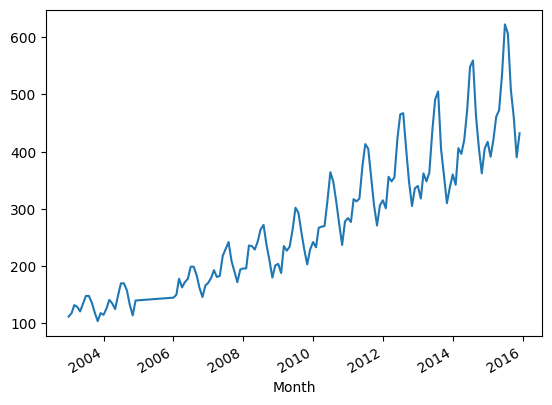

In [12]:
df["Passengers"].plot()
plt.show()

In [14]:
!pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [15]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df["Passengers"])
p_value = result[1]
print (f"p value is {p_value}")

if (p_value>0.05):
    print("The Given Time Series is a - Non Stationary Time Series (Null Hypothesis follows)")
else:
    print("The given time series is a - Statiionary Time Series (Alternate Hypothesis follows)")

p value is 0.991880243437641
The Given Time Series is a - Non Stationary Time Series (Null Hypothesis follows)


In [16]:
#1st order difference 

result = adfuller(df["Passengers"].diff().dropna())
p_value = result[1]
print (f"p value is {p_value}")

if (p_value>0.05):
    print("The Given Time Series is a - Non Stationary Time Series (Null Hypothesis follows)")
else:
    print("The given time series is a - Statiionary Time Series (Alternate Hypothesis follows)")

p value is 0.0542132902838255
The Given Time Series is a - Non Stationary Time Series (Null Hypothesis follows)


In [17]:
#2nd order difference 

result = adfuller(df["Passengers"].diff().diff().dropna())
p_value = result[1]
print (f"p value is {round(p_value,2)}")

if (p_value>0.05):
    print("The Given Time Series is a - Non Stationary Time Series (Null Hypothesis follows)")
else:
    print("The given time series is a - Statiionary Time Series (Alternate Hypothesis follows)")

p value is 0.0
The given time series is a - Statiionary Time Series (Alternate Hypothesis follows)


In [18]:
!pip install pmdarima

Defaulting to user installation because normal site-packages is not writeable


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



   ---------------------------------------- 0.0/625.1 kB ? eta -:--:--
   ---------------------------------------- 0.0/625.1 kB ? eta -:--:--
   ---------------------------------------- 625.1/625.1 kB 3.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   ----------------------------------- ---- 2.4/2.7 MB 13.4 MB/s eta 0:00:01
   ----------------------------------- ---- 2.4/2.7 MB 13.4 MB/s eta 0:00:01
   ---------------------------------------- 2.7/2.7 MB 4.6 MB/s eta 0:00:00


In [19]:
import pmdarima as pm
pm.auto_arima(df['Passengers'], trace=True)

C:\Users\Luiz_gustavo_Andrade\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Luiz_gustavo_Andrade\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Luiz_gustavo_Andrade\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Luiz_gustavo_Andrade\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Luiz_gustavo_Andrade\AppData\Roaming\Python\Python312\site-pack

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1415.278, Time=0.00 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1403.473, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1398.827, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1413.909, Time=0.00 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1396.121, Time=0.04 sec


C:\Users\Luiz_gustavo_Andrade\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Luiz_gustavo_Andrade\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Luiz_gustavo_Andrade\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Luiz_gustavo_Andrade\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Luiz_gustavo_Andrade\AppData\Roaming\Python\Python312\site-pack

 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.07 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1398.386, Time=0.04 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1397.975, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1394.683, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1397.258, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1401.852, Time=0.03 sec


C:\Users\Luiz_gustavo_Andrade\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Luiz_gustavo_Andrade\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Luiz_gustavo_Andrade\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Luiz_gustavo_Andrade\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Luiz_gustavo_Andrade\AppData\Roaming\Python\Python312\site-pack

 ARIMA(2,1,1)(0,0,0)[0]             : AIC=1378.338, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=1396.588, Time=0.03 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=1379.614, Time=0.07 sec


C:\Users\Luiz_gustavo_Andrade\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Luiz_gustavo_Andrade\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Luiz_gustavo_Andrade\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(0,0,0)[0]             : AIC=inf, Time=0.15 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=1385.498, Time=0.04 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=1395.021, Time=0.03 sec
 ARIMA(3,1,2)(0,0,0)[0]             : AIC=1377.086, Time=0.07 sec


C:\Users\Luiz_gustavo_Andrade\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Luiz_gustavo_Andrade\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Luiz_gustavo_Andrade\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Luiz_gustavo_Andrade\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,2)(0,0,0)[0]             : AIC=1373.560, Time=0.13 sec
 ARIMA(4,1,1)(0,0,0)[0]             : AIC=1384.053, Time=0.11 sec


C:\Users\Luiz_gustavo_Andrade\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Luiz_gustavo_Andrade\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,1,2)(0,0,0)[0]             : AIC=1375.353, Time=0.16 sec


C:\Users\Luiz_gustavo_Andrade\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,3)(0,0,0)[0]             : AIC=1365.825, Time=0.24 sec


C:\Users\Luiz_gustavo_Andrade\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,3)(0,0,0)[0]             : AIC=inf, Time=0.29 sec


C:\Users\Luiz_gustavo_Andrade\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,1,3)(0,0,0)[0]             : AIC=inf, Time=0.34 sec


C:\Users\Luiz_gustavo_Andrade\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,4)(0,0,0)[0]             : AIC=inf, Time=0.35 sec


C:\Users\Luiz_gustavo_Andrade\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,4)(0,0,0)[0]             : AIC=inf, Time=0.27 sec


C:\Users\Luiz_gustavo_Andrade\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,1,4)(0,0,0)[0]             : AIC=inf, Time=0.29 sec


C:\Users\Luiz_gustavo_Andrade\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.27 sec

Best model:  ARIMA(4,1,3)(0,0,0)[0]          
Total fit time: 3.540 seconds


,order,"(4, ...)"
,seasonal_order,"(0, ...)"
,start_params,None
,method,'lbfgs'
,maxiter,50
,suppress_warnings,True
,out_of_sample_size,0
,scoring,'mse'
,scoring_args,{}
,trend,None
,with_intercept,False


In [20]:
# perform the Fetch

import statsmodels.api as sm
model = sm.tsa.arima.ARIMA(df['Passengers'], order=(4,1,3))
result = model.fit()

C:\Users\Luiz_gustavo_Andrade\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Luiz_gustavo_Andrade\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Luiz_gustavo_Andrade\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [21]:
print (f"Next Forecast is : { result.forecast()}")

Next Forecast is : 144    467.573775
dtype: float64


C:\Users\Luiz_gustavo_Andrade\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Luiz_gustavo_Andrade\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
